In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

df=pd.read_csv("../data/Trained_selected_features.csv")
features = ['exang', 'ca', 'cp_3.0', 'cp_4.0', 'thal_7.0']
X_train = df[features]
y_train = df['target']




🔍 Cross-validation results (5-fold):

📌 Logistic
   Accuracy: 0.815
   Precision: 0.841
   Recall: 0.727
   F1 Score: 0.778
   ROC AUC: 0.863

📌 Decision Tree
   Accuracy: 0.784
   Precision: 0.801
   Recall: 0.697
   F1 Score: 0.742
   ROC AUC: 0.785

📌 Random Forest
   Accuracy: 0.788
   Precision: 0.791
   Recall: 0.727
   F1 Score: 0.755
   ROC AUC: 0.820

📌 SVM
   Accuracy: 0.770
   Precision: 0.766
   Recall: 0.717
   F1 Score: 0.737
   ROC AUC: 0.838



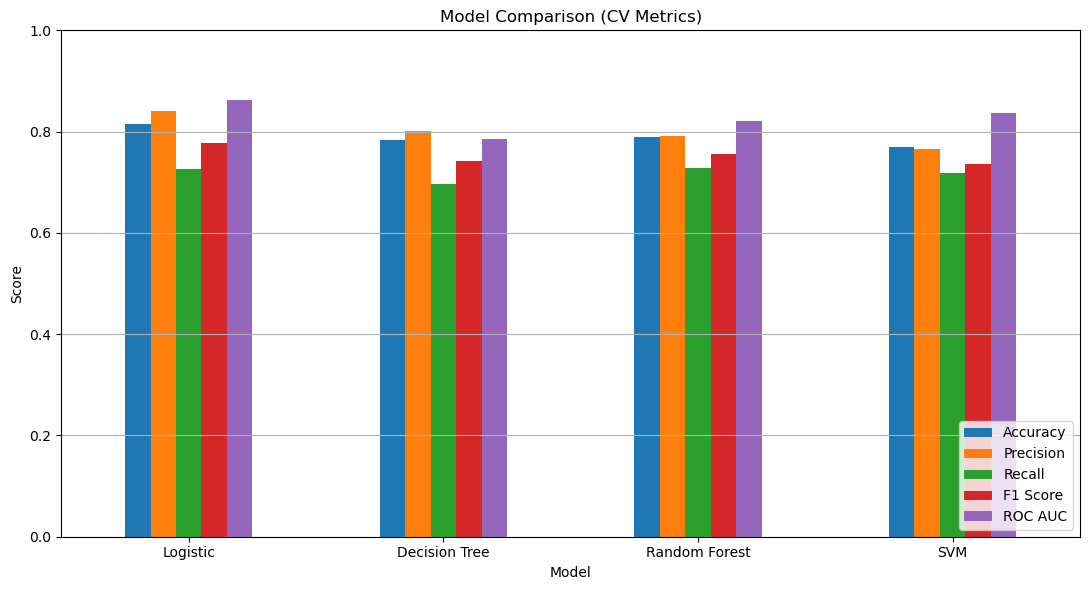

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

# Define models
models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# Custom scorers
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = []

# Cross-validation loop
print("🔍 Cross-validation results (5-fold):\n")
for name, model in models.items():
    scores = cross_validate(
        model, X_train, y_train,
        cv=5,
        scoring=scoring,
        return_train_score=False
    )
    result = {
        'Model': name,
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1 Score': scores['test_f1'].mean(),
        'ROC AUC': scores['test_roc_auc'].mean()
    }
    results.append(result)
    # Print metrics
    print(f"📌 {name}")
    for key, value in result.items():
        if key != "Model":
            print(f"   {key}: {value:.3f}")
    print()

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot bar chart
results_df.set_index('Model').plot(kind='bar', figsize=(11, 6))
plt.title("Model Comparison (CV Metrics)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()